In [44]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("crop_recommendation.csv")

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,95,52,35,20.879744,82.002744,6.502985,202.935536,rice
1,82,56,36,21.770462,80.319644,7.038096,226.655537,rice
2,62,60,45,23.004459,82.320763,7.840207,263.964248,rice
3,61,60,35,26.491096,80.158363,6.980401,242.864034,rice
4,87,59,43,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,104,31,27,26.774637,66.413269,6.780064,177.774507,coffee
2196,113,26,31,27.417112,56.636362,6.086922,127.924610,coffee
2197,116,34,32,24.131797,67.225123,6.362608,173.322839,coffee
2198,118,26,31,26.272418,52.127394,6.758793,127.175293,coffee
2199,99,36,28,23.603016,60.396475,6.779833,140.937041,coffee


In [38]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,95,52,35,20.879744,82.002744,6.502985,202.935536,rice
1,82,56,36,21.770462,80.319644,7.038096,226.655537,rice
2,62,60,45,23.004459,82.320763,7.840207,263.964248,rice
3,61,60,35,26.491096,80.158363,6.980401,242.864034,rice
4,87,59,43,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,104,31,27,26.774637,66.413269,6.780064,177.774507,coffee
2196,113,26,31,27.417112,56.636362,6.086922,127.924610,coffee
2197,116,34,32,24.131797,67.225123,6.362608,173.322839,coffee
2198,118,26,31,26.272418,52.127394,6.758793,127.175293,coffee


In [39]:
df[4:7]

,N,P,K,temperature,humidity,ph,rainfall,label
4,87,59,43,20.130175,81.604873,7.628473,262.71734,rice
5,78,36,45,23.058049,83.370118,7.073454,251.05500,rice
6,100,44,43,22.708838,82.639414,5.700806,271.32486,rice


In [7]:
df.size

17600

In [8]:
df.shape

(2200, 8)

In [9]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [40]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [11]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
# df.dropna(df.median())
# df.dropna()

In [43]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<AxesSubplot:>

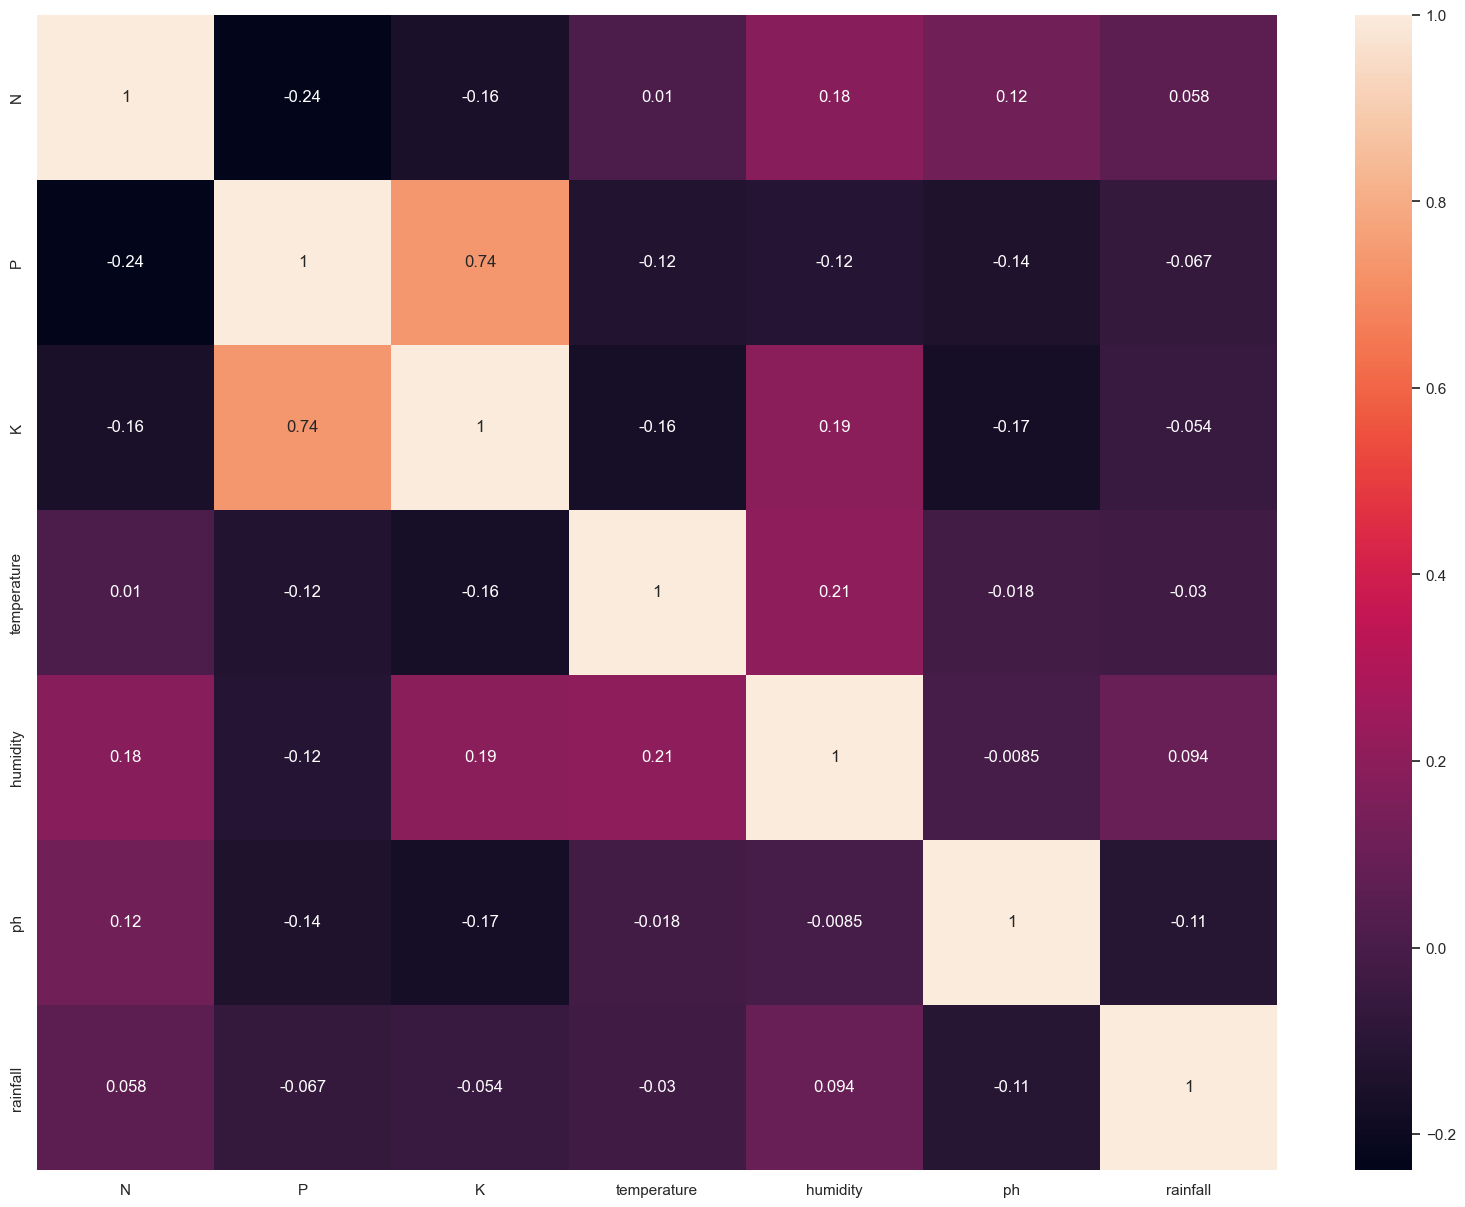

In [13]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [14]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

# features = df,drop['label']
# target = df['label']

# x = df.iloc[:,:1]
# y = df.iloc[:,1]

In [15]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [16]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  91.36363636363637
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       1.00      0.96      0.98        23
       maize       0.83      0.95      0.89        21
       mango       1.00      0.92      0.96        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [20]:
score

array([0.94090909, 0.90227273, 0.89318182, 0.92272727, 0.93636364])

### Saving trained Decision Tree model

In [49]:
import pickle

# Open the file to save as pkl file
DT_Model_pkl = open('DecisionTree.pkl', 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [23]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99772727, 0.99318182, 0.99090909, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [24]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [25]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9818181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.89      0.91        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       0.93      1.00      0.96        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [26]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98863636, 0.98181818, 0.98409091, 0.98409091, 0.97727273])

In [27]:
#Saving trained SVM model

In [28]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.89      1.00      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.96      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [30]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99090909, 0.99090909, 0.99090909])

### Saving trained Random Forest model

In [31]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

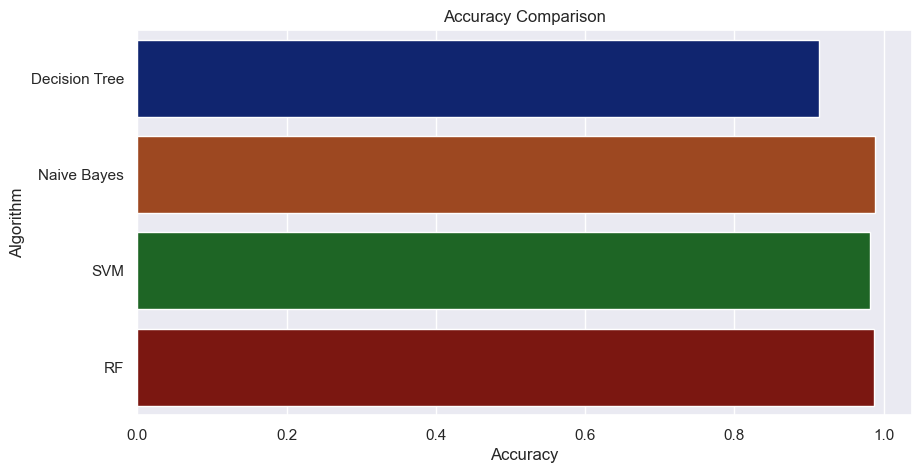

In [32]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [33]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9136363636363637
Naive Bayes --> 0.9886363636363636
SVM --> 0.9818181818181818
RF --> 0.9863636363636363


## Making a prediction

In [51]:
data = np.array([[12,12,12,121,21,21,21]])
prediction = RF.predict(data)
print(prediction[0])

kidneybeans


In [54]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction[0])

coffee


In [36]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [58]:
from tkinter import *
from tkinter import ttk

root = Tk()
root.title('Crop Prediction System')
root.geometry('850x650')
root.configure(background="purple2")
var = StringVar()
label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="purple2")
var.set('Crop and fertilizer Prediction System')
label.grid(row=0,columnspan=6)

label_1 = ttk.Label(root, text ='nitrogen',font=("Helvetica", 16),background="Purple3")
label_1.grid(row=11,column=0)
    
Entry_1= Entry(root)
Entry_1.grid(row=11,column=1)

label_2 = ttk.Label(root, text ='phosporus',font=("Helvetica", 16),background="Purple3")
label_2.grid(row=12,column=0)
    
Entry_2 = Entry(root)
Entry_2.grid(row=12,column=1)
    
    
label_3 = ttk.Label(root, text ='pottasium',font=("Helvetica", 16),background="Purple3")
label_3.grid(row=13,column=0)
    
Entry_3 = Entry(root)
Entry_3.grid(row=13,column=1)

label_4 = ttk.Label(root, text ='temperature',font=("Helvetica", 16),background="Purple3")
label_4.grid(row=14,column=0)
    
Entry_4= Entry(root)
Entry_4.grid(row=14,column=1)


label_5 = ttk.Label(root, text ='humidity',font=("Helvetica", 16),background="Purple3")
label_5.grid(row=15,column=0)
    
Entry_5 = Entry(root)
Entry_5.grid(row=15,column=1)


label_6 = ttk.Label(root, text ='ph',font=("Helvetica", 16),background="Purple3")
label_6.grid(row=16,column=0)
    
Entry_6 = Entry(root)
Entry_6.grid(row=16,column=1)


label_7 = ttk.Label(root, text ='rainfall',font=("Helvetica", 16),background="Purple3")
label_7.grid(row=17,column=0)
    
Entry_7 = Entry(root)
Entry_7.grid(row=17,column=1)



def predict():
    N = Entry_1.get()
    P = Entry_2.get()
    K = Entry_3.get()
    temperature = Entry_4.get()
    humidity = Entry_5.get()
    ph =Entry_6.get()  
    rainfall = Entry_7.get()   
    out = RF.predict([[float(N),
       float(P),
       float(K),
       float(temperature),
       float(humidity),
       float(ph),
       float(rainfall)]])     ##float(area)
    
    output.delete(0,END)
    output.insert(0,out[0])

b1 = Button(root, text = 'predict',font=("Helvetica", 16),background="Purple3",command = predict)
b1.grid(row=20,column=0)
    

output = Entry(root)
output.grid(row=20,column=1)
    
root.mainloop()


In [56]:
from tkinter import *
from tkinter import ttk

root = Tk()
root.title('Crop Prediction System')
root.geometry('850x650')
root.configure(background="purple2")
var = StringVar()
label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="purple2")
var.set('Crop and fertilizer Prediction System')
label.grid(row=0,columnspan=6)

label_1 = ttk.Label(root, text ='nitrogen',font=("Helvetica", 16),background="Purple3")
label_1.grid(row=11,column=0)
    
Entry_1= Entry(root)
Entry_1.grid(row=11,column=1)

label_2 = ttk.Label(root, text ='phosporus',font=("Helvetica", 16),background="Purple3")
label_2.grid(row=12,column=0)
    
Entry_2 = Entry(root)
Entry_2.grid(row=12,column=1)
    
    
label_3 = ttk.Label(root, text ='pottasium',font=("Helvetica", 16),background="Purple3")
label_3.grid(row=13,column=0)
    
Entry_3 = Entry(root)
Entry_3.grid(row=13,column=1)

label_4 = ttk.Label(root, text ='temperature',font=("Helvetica", 16),background="Purple3")
label_4.grid(row=14,column=0)
    
Entry_4= Entry(root)
Entry_4.grid(row=14,column=1)


label_5 = ttk.Label(root, text ='humidity',font=("Helvetica", 16),background="Purple3")
label_5.grid(row=15,column=0)
    
Entry_5 = Entry(root)
Entry_5.grid(row=15,column=1)


label_6 = ttk.Label(root, text ='ph',font=("Helvetica", 16),background="Purple3")
label_6.grid(row=16,column=0)
    
Entry_6 = Entry(root)
Entry_6.grid(row=16,column=1)


label_7 = ttk.Label(root, text ='rainfall',font=("Helvetica", 16),background="Purple3")
label_7.grid(row=17,column=0)
    
Entry_7 = Entry(root)
Entry_7.grid(row=17,column=1)



def predict():
    N = Entry_1.get()
    P = Entry_2.get()
    K = Entry_3.get()
    temperature = Entry_4.get()
    humidity = Entry_5.get()
    ph =Entry_6.get()  
    rainfall = Entry_7.get()   
    out = RF.predict([[float(N),
       float(P),
       float(K),
       float(temperature),
       float(humidity),
       float(ph),
       float(rainfall)]])     ##float(area)
    
    output.configure(text=out[0])

b1 = Button(root, text = 'predict',font=("Helvetica", 16),background="Purple3",command = predict)
b1.grid(row=20,column=0)
    

output = Label(root,width=20)
output.grid(row=20,column=1)
    
root.mainloop()
